#####  앞글자 EX)diclofenac ~~~ 가 같은 경우는 모두 해당 성분이 포함되어 있는 약물
#### 출저 : https://nedrug.mfds.go.kr/searchDrug

- encapsulated <-> 알약/비알약
- diclofenac diethylammonium
- diclofenac epolamine (as diclofenac)
- diclofenac potassium
- diclofenac sodium
- diclofenac-β-dimethyl-aminoethanol	
- diphenhydramine hydrochloride	
- diphenhydramine HCl
- diphenhydramine citrate
- diphenhydramine salicylate
- ibuprofen piconol
- ibuprofen lysine
- ibuprofen sodium dihydrate
- benzalkonium chloride solution

##### 앞글자 3개만 추출하여 '일반명' 데이터 분리

## 모듈

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore') 
pd.set_option('display.max_rows', None)

## 데이터 업로드

In [2]:
df = pd.read_csv('건강보험심사평가원_의약품주성분_20221001.csv', encoding='cp949')

In [3]:
df.head()

,일반명코드,제형구분코드,제형,일반명,분류번호,투여,함량,단위
0,100101AGN,GN,"과립제,세립",상황균사체엑스,421,내복,1.1,g
1,100101ALQ,LQ,액제,상황균사체엑스,421,내복,1.1,g
2,100101APD,PD,산제,phellinus linteus mycelliun ext.,421,내복,1.1,g
3,100102ACH,CH,경질캡슐제,phellinus linteus mycelliun ext.,421,내복,0.55,g
4,100102ALQ,LQ,액제,phellinus linteus mycelliun ext.,421,내복,1.1,g(55mg/mL)


In [4]:
df.shape

(55854, 8)

In [5]:
# 결측치 확인
df.isnull().sum()

일반명코드       0
제형구분코드    298
제형        298
일반명         0
분류번호        0
투여          0
함량          0
단위        478
dtype: int64

#### 의약품 추출

In [6]:
def mdrug_data(df, keywords):
    
    # 데이터 추출  
    df = df[df['일반명'].str.contains('|'.join(keywords), case=False)]
    return df

In [7]:
# 키워드 지정
keywords = ['acetaminophen', 'clarithromycin', 'diclofenac', 'diphenhydramine',
            'florfenicol', 'ibuprofen', 'Mefenamic acid', 'roxithromycin',
            'benzalkonium chloride']

# 함수 호출
df = mdrug_data(df, keywords)

In [8]:
df.head()

,일반명코드,제형구분코드,제형,일반명,분류번호,투여,함량,단위
31,101301AEL,EL,엘릭서제,acetaminophen,114,내복,24,mg
32,101302CLQ,LQ,액제,acetaminophen,114,외용,125,mg
33,101302CSP,SP,좌제,acetaminophen,114,외용,0.125,g
34,101303ACH,CH,경질캡슐제,acetaminophen,114,내복,300,mg
35,101303ATB,TB,"정제,저작정",acetaminophen,114,내복,0.3,g


In [9]:
df.shape

(1355, 8)

#### dexibuprofen 데이터 삭제(유일하게 ibuprofen 약품과 다른 약품으로 판별)

In [10]:
# 'dexibuprofen'이 포함된 데이터 수 확인
count = df['일반명'].str.contains('dexibuprofen').sum()
print("dexibuprofen 개수:", count)

dexibuprofen 개수: 16


In [11]:
# 'dexibuprofen'이 포함된 데이터 제거
df = df[~df['일반명'].str.contains('dexibuprofen')]

In [12]:
# '일반명코드'와 '일반명'을 제외하고 전부 삭제
df_drop = ['제형구분코드','제형','분류번호','투여','함량','단위']
df = df.drop(columns=df_drop)

In [13]:
# '일반명' 코드 3글자만 출력/소문자로 변환
df['일반명'] = df['일반명'].apply(lambda x: x[:3].lower())

In [14]:
# '일반명' 열 정렬
df= df.sort_values('일반명')

In [15]:
# 인덱스 재설정
df.reset_index(drop=True, inplace=True)

In [16]:
df.shape

(1339, 2)

In [17]:
# '일반명' 데이터 구성 확인
df['일반명'].unique()

array(['ace', 'ben', 'cla', 'dic', 'dip', 'ibu', 'mef', 'rox'],
      dtype=object)

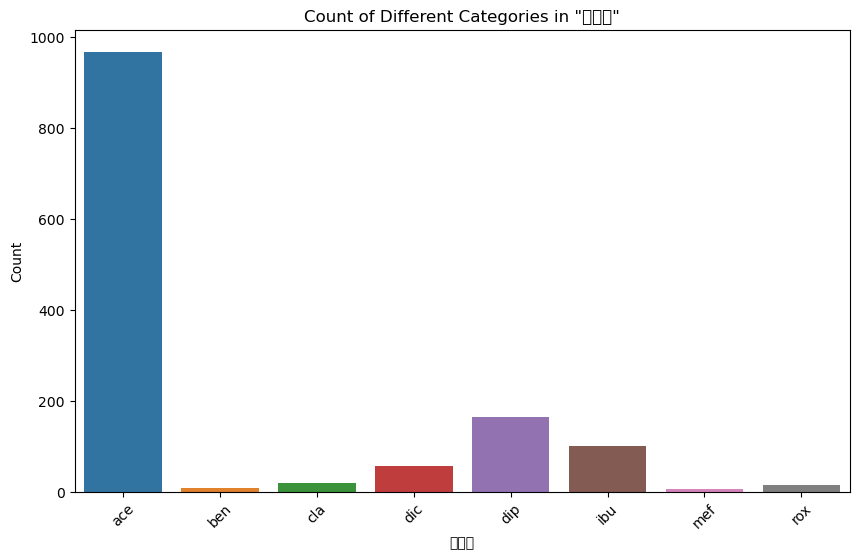

In [22]:
# 약품 성분 분포 확인
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='일반명')
plt.title('Count of Different Categories in ""')
plt.xlabel('일반명')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [18]:
# 데이터 확인
df.head(50)

,일반명코드,일반명
0,101301AEL,ace
1,D13800ACS,ace
2,D13700ACS,ace
3,D13700ACS,ace
4,D13600ACS,ace
5,D13600ACS,ace
6,D13500ACS,ace
7,D13800ACS,ace
8,D12600ATB,ace
9,D12000ACH,ace


#### 데이터 추출

In [19]:
df.to_csv('폐의약품 코드.csv',index=False)